# Linear Modelling - Maxiumum Likelihood

One approach to learning parameters is minimizing the loss function, another method is to incorporate a random variable to denote _noise_, which has considerable advantages over are former approach.

## The Gaussian (normal) distribution

A Gaussian distribution is defined over the sample space of all real numbers with the pdf for a random varaible $Y$ as the following:

$$
p(y \mid \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left\{ - \frac{1}{2 \sigma^2} (y - \mu)^2 \right\}}
$$

The common shorthand notation is the following:

$$
p(y \mid \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2)
$$

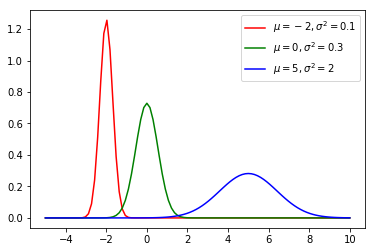

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis = np.linspace(-5, 10, 100)

plt.plot(x_axis, norm.pdf(x_axis,-2,0.1 ** 0.5), 'r', label="$\mu = -2, \sigma^2 = 0.1$")
plt.plot(x_axis, norm.pdf(x_axis,0,0.3 ** 0.5), 'g', label="$\mu = 0, \sigma^2 = 0.3$")
plt.plot(x_axis, norm.pdf(x_axis,5,2 ** 0.5), 'b', label="$\mu = 5, \sigma^2 = 2$")
plt.legend()
plt.show()

## Thinking generatively

If we think how we could generate mens 100m times that looks like the data we observe we would arive at the following:

$$
t_n = \mathbf{w}^T \mathbf{x}_n + \epsilon_n
$$

where $\epsilon_n$ is a random variable.

Now we need to determine the distribution for $\epsilon_n$. Our model is continous thus $\epsilon_n$ is must be a continous random varible. Their is a random variable for each Olympic year, and its a resonable assumption that these values are independent.

$$
p(\epsilon_1, ..., \epsilon_n) = \prod_{n=1}^N p(\epsilon_n)
$$

Lets assume $p(\epsilon_n)$ follows a Gaussian distribution with a zero mean and variance $\sigma$. Our model can now be described as two components:

1. A _deterministic_ component ($\mathbf{w}^T \mathbf{x}_n$) referred to as a _trend_ or _drift_
2. A random component ($\epsilon_n$) referred to as _noise_

In our case the noise is _additive_ but some applications might call for _mulitiplicative_ noise such as pixel degradation.

## Likelihood

Our model is of the following form:

$$
t_n = f(x_n; \mathbf{w}) + \epsilon_n \quad \epsilon_n \sim \mathcal{N}(0, \sigma^2)
$$

We cant minimize the loss since $t_n$ is no longer a fixed value, its a random variable. Adding a constant ($\mathbf{w}^T \mathbf{x}_n$) to a Gausian distributed random variable is equivalent to a new Gausian random variable with the constant added to the mean. Thus $t_n$ has the following pdf:

$$
p(t_n \mid \mathbf{x}_n, \mathbf{w}, \sigma^2) = \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2)
$$

We can use this to find optimal values for $\mathbf{w}$ and $\sigma^2$, consider the year 1980, using the values for $\mathbf{w}$ we found previously and assuming $\sigma^2 = 0.05$ we can plot:

$$
p\left(t_n \mid \mathbf{x}_n = \begin{bmatrix}1\\1980\end{bmatrix}, \mathbf{w} = \begin{bmatrix}36.416\\-0.0133\end{bmatrix}, \sigma^2 = 0.05 \right)
$$

mu = 10.021302194800871, sigma^2 = 0.05


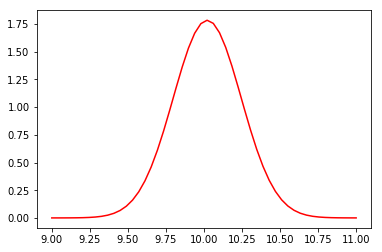

In [2]:
mu = 36.41645590250286 - 0.013330885710960602 * 1980
sigma2 = 0.05 

print("mu = {}, sigma^2 = {}".format(mu, sigma2))

x_axis = np.linspace(9, 11, 50)

plt.plot(x_axis, norm.pdf(x_axis, mu, sigma2 ** 0.5), 'r')
plt.show()

According to the graph the most _likely_ winning time for 1980 is $10.02$ seconds. The actuall time was $10.25$, thus we need to tune the parameters $\mathbf{w}$ and $\sigma^2$ to make the density as high as possible at $t = 10.25$.

## Dataset likelihood

We can extend this to the whole dataset by finding the joint conditional density:

$$
p(t_1, ..., t_N \mid \mathbf{x}_1, ..., \mathbf{x}_N, \mathbf{w}, \sigma^2)
$$

By using the vector notation defined previously and the assumption that the noise at each datapoint is independent, we get the following:

$$
L = p(\mathbf{t} \mid \mathbf{X}, \mathbf{w}, \sigma^2) = \prod_{n=1}^N p(t_n \mid \mathbf{x_n}, \mathbf{w}, \sigma^2) = \prod_{n=1}^N \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2)
$$

## Maximum likelihood

To find $\widehat{\mathbf{w}}$ and $\widehat{\sigma^2}$ clearly we need to maximize the value of $L$, to do this we will maximize the log-likelyhood (for analytical reasons)

$$
\begin{align}
L &= \prod_{n=1}^N \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2) \\
\log L &= \log \left(\prod_{n=1}^N \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2) \right) \\
&= \sum_{n=1}^N \log \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2) \\
&= \sum_{n=1}^N \log \left( \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left\{ - \frac{1}{2 \sigma^2} (t_n - \mathbf{w}^T \mathbf{x}_n)^2 \right\}} \right) \\
&= \sum_{n=1}^N \left( -\frac{1}{2} \log(2 \pi) - \log \sigma - \frac{1}{2 \sigma^2} (t_n - \mathbf{w}^T \mathbf{x}_n)^2 \right) \\
&= -\frac{N}{2} \log(2 \pi) - N \log \sigma - \frac{1}{2 \sigma^2} \sum_{n=1}^N (t_n - \mathbf{w}^T \mathbf{x}_n)^2 \\
\end{align}
$$

As previosly we differentiate and set to zero to find the turning point, in this case we want a maximum.

$$
\begin{align}
\frac{\partial \log L}{\partial \mathbf{w}} &= \frac{1}{\sigma^2} \sum^N_{n=1} \mathbf{x}_n(t_n - \mathbf{x}_n^T \mathbf{w}) \\
&= \frac{1}{\sigma^2} \sum^N_{n=1} \mathbf{x}_n t_n - \mathbf{x}_n \mathbf{x}_n^T \mathbf{w} \\
\end{align}
$$

Using the vector/matix notation from earlier, $\sum_{n=1}^N \mathbf{x}_n t_n$ becomes $\mathbf{X}^T \mathbf{t}$ and $\sum_{n=1}^N \mathbf{x}_n \mathbf{x}_n^T \mathbf{w}$ becomes $\mathbf{X}^T \mathbf{Xw}$, thus the derivitive becomes:

$$
\frac{\partial \log L}{\partial \mathbf{w}} = \frac{1}{\sigma^2} (\mathbf{X}^T \mathbf{t} - \mathbf{X}^t \mathbf{Xw})
$$

Setting the derivitive to $\mathbf{0}$ (a vector with all zeros) and solving for $\mathbf{w}$ gives us:

$$
\begin{align}
\frac{1}{\sigma^2} (\mathbf{X}^T \mathbf{t} - \mathbf{X}^t \mathbf{Xw}) &= \mathbf{0} \\
\mathbf{X}^T \mathbf{t} - \mathbf{X}^t \mathbf{Xw} &= \mathbf{0} \\
- \mathbf{X}^t \mathbf{Xw} &= - \mathbf{X}^T \mathbf{t} \\
\mathbf{X}^t \mathbf{Xw} &= \mathbf{X}^T \mathbf{t} \\
\widehat{\mathbf{w}} &= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t} \\
\end{align}
$$

This is the same result as minimizing the squared loss. Minimising the squared loss is equivalent to the maximum likelihood solution if the noise is assumed to be Gaussian.

Now we repeat the process for $\sigma^2$

$$
\begin{align}
\frac{\partial \log L}{\partial \sigma^2} &= - \frac{N}{\sigma} + \frac{1}{\sigma^3} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2
\end{align}
$$

$$
\begin{align}
- \frac{N}{\sigma} + \frac{1}{\sigma^3} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 &= 0 \\ 
\frac{1}{\sigma^3} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 &= \frac{N}{\sigma} \\
\sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 &= N \sigma^2 \\
\widehat{\sigma^2} &= \frac{1}{N} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 \\
\end{align}
$$

This makes sence, the variance is the average square error. We can use the fact that $\sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2$ is equivalent to $(\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}})^T (\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}})$

$$
\begin{align}
\widehat{\sigma^2} &= \frac{1}{N} (\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}})^T (\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - 2 \mathbf{t}^T \mathbf{X} \widehat{\mathbf{w}} + \widehat{\mathbf{w}}^T \mathbf{X}^T \mathbf{X} \widehat{\mathbf{w}}) \\
\end{align}
$$

Now using $\widehat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}$ and $\widehat{\mathbf{w}}^T = \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1}$

$$
\begin{align}
\widehat{\sigma^2} &= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - 2 \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t} + \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - 2 \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t} + \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - \mathbf{t}^T \mathbf{X} \widehat{\mathbf{w}}) \\
\end{align}
$$

In [3]:
x_values = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 
     1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]
t_values = [12.00, 11.00, 11.00, 11.20, 10.80, 10.80, 10.80, 10.60, 10.80, 10.30, 10.30, 10.30, 10.40, 10.50, 
     10.20, 10.00, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69]

N = len(x_values)
X = np.matrix([[1,x] for x in x_values])
XT = np.transpose(X)
tT = np.matrix([t_values])
t = np.transpose(tT)

best_w = ((XT * X) ** -1) * XT * t
best_sigma2 = (1/N) * (tT * t - tT * X * best_w)

print("w = {}\n\nsigma^2 = {}".format(best_w, best_sigma2))

w = [[  3.64164559e+01]
 [ -1.33308857e-02]]

sigma^2 = [[ 0.05030711]]
